<a href="https://colab.research.google.com/github/RR77ui/Business-Intelligence/blob/main/Integracion%20de%20datos/Reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto 1**
Caracterizacion de la distribucion agregada de perdidas de una fintech, se quiere caracterizar (Media,desviacion,Asimetria y curtosis) la distribucion agregada de perdidas como resultado de las perdidas asociadas a los creditos que posee una fintech. Las variables que definen la loss distribution aproach se obtiene de las siguientes variables:
* Monto(EAD):Es la cantidad de dinero que una persona solicita a la fintech
* Probabilidad de default: es la probabilidad de que una persona incumpla el credito a lo largo de su vigencia
* LGD(Loss guarantee default): La garantia que tiene el solicitante sobre el credito (Casa,Carro,Beca,Finca,Etc)

0.Cargar las librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1.Cargar los datos

In [ ]:
nxl="/content/drive/MyDrive/Integración de datos y prospectiva/1. SolicitantesCrédito(USD)_Años.xlsx"
XDB4=pd.read_excel(nxl,sheet_name=2)
XDB3=pd.read_excel(nxl,sheet_name=3)
XDB2=pd.read_excel(nxl,sheet_name=4)
XDB1=pd.read_excel(nxl,sheet_name=5)
display(XDB1)
display(XDB2)
display(XDB3)
display(XDB4)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,6436,54,Mujer,Separado,0,1,1,3,Técnico,Indefinido,...,18,87.483415,Buenas Referencias,Codeudor,Sin Patrimonio,Mora mayor a 60 Dìas,1,0.024565,623.369751,0.457573
1,6437,28,Hombre,Casado,1,0,0,3,Tecnólogo,Ninguno,...,60,6.849567,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.113544,491.716217,0.528300
2,6438,27,NR,Soltero,1,1,1,2,Primaria,Indefinido,...,48,5.907680,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.140295,416.151337,0.116118
3,6439,43,Mujer,Soltero,3,3,3,2,Técnico,Ninguno,...,36,8.664364,Buena Experiencia CFB,Libranza Establecida,Prop.sin Hipoteca,Sin experiencia,0,0.289542,381.160431,0.606498
4,6440,49,Mujer,Soltero,0,1,1,2,Bachiller,Ninguno,...,3,167.064101,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.135805,378.608978,0.046469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,8372,48,Hombre,Separado,0,0,0,3,Tecnólogo,Fijo,...,36,27.043503,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.056132,550.980408,0.122566
1338,8374,31,Hombre,Soltero,2,0,0,5,Bachiller,Indefinido,...,48,25.579568,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.035120,659.471375,0.321453
1339,8375,38,Hombre,Separado,0,0,0,3,Bachiller,Labor Contratada,...,36,21.508792,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.101976,465.011536,0.017814
1340,8376,43,Mujer,Casado,1,2,2,2,Tecnólogo,Ninguno,...,36,11.047468,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.156707,423.237305,0.265477


,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,4285,52,Hombre,Casado,0,0,0,3,Tecnólogo,Indefinido,...,24,5.966434,Buenas Referencias,Hipoteca,Prop.sin Hipoteca,Mora mayor a 60 Dìas,0,0.253213,358.859253,0.109183
1,4286,31,Hombre,Casado,3,1,1,2,Bachiller,Ninguno,...,3,82.453584,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.212950,296.161011,0.004476
2,4288,29,NR,Soltero,0,0,0,3,Tecnólogo,Fijo,...,24,22.023156,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Màximo 3 moras 30 Dìas,1,0.105714,406.482330,0.120763
3,4292,38,Mujer,Casado,0,0,0,2,Técnico,Ninguno,...,36,3.179137,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.292361,312.640320,0.162121
4,4294,32,NR,Soltero,1,0,0,3,Bachiller,Fijo,...,36,17.509553,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.082367,472.922882,0.210041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6431,41,NR,Casado,3,3,3,2,Primaria,Ninguno,...,36,3.565784,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.310774,363.216125,0.170423
1496,6432,43,Hombre,Viudo,1,1,1,5,Técnico,Fijo,...,24,21.137539,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.129138,489.444824,0.394218
1497,6433,49,NR,Casado,0,2,2,2,Tecnólogo,Ninguno,...,36,27.632010,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081944,505.672943,0.196060
1498,6434,65,NR,Soltero,3,0,0,2,Bachiller,Indefinido,...,48,14.354478,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.084422,568.723694,0.318254


,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,2112,33,Hombre,Casado,0,1,1,4,Técnico,Indefinido,...,18,52.546662,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.064700,498.646271,0.005317
1,2115,42,Hombre,Soltero,1,1,1,5,Bachiller,Ninguno,...,18,2.808395,Sin Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.297233,371.733276,0.295880
2,2116,34,Hombre,Soltero,0,2,2,2,Bachiller,Indefinido,...,36,10.409358,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.122595,418.416077,0.004645
3,2117,47,Hombre,Casado,1,0,0,3,Profesional,Indefinido,...,24,80.445793,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,1,0.034746,593.847656,0.385068
4,2118,67,Mujer,Casado,1,0,0,3,Bachiller,Indefinido,...,36,27.508639,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081015,567.578308,0.054015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,4275,52,NR,Soltero,3,0,0,3,Bachiller,Indefinido,...,36,2.723832,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.300094,392.462311,0.061951
1497,4277,41,Hombre,Soltero,0,0,0,3,Técnico,Ninguno,...,24,29.256105,Buena Experiencia CFB,Fondo de Garantia,Sin Patrimonio,Con Experiencia sin Mora,1,0.070680,471.957642,0.181782
1498,4279,47,Hombre,Casado,0,0,0,5,Primaria,Indefinido,...,24,48.038625,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.016880,676.783752,0.155792
1499,4281,29,NR,Soltero,0,0,0,2,Bachiller,Ninguno,...,18,26.637042,Buenas Referencias,Con Codeudor(es),Prop.y Vehìculo,Con Experiencia sin Mora,1,0.154959,326.336273,0.511715


,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.168536
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.173085
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.082779
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.463798
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.160611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2107,34,Hombre,Separado,0,1,1,2,Técnico,Ninguno,...,48,1.648938,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.318118,332.775055,0.358276
1496,2109,43,Mujer,Casado,6,0,0,3,Bachiller,Indefinido,...,36,1.617232,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.319108,386.770935,0.199316
1497,2110,29,Mujer,Casado,1,1,1,3,Ninguno,Indefinido,...,3,132.534580,Buena Experiencia CFB,Fondo de Garantia,Vehìculo sin Prenda,Con Experiencia sin Mora,0,0.149004,351.520782,0.124456
1498,2111,49,Mujer,Casado,1,0,0,5,Bachiller,Indefinido,...,24,43.986039,Buena Experiencia CFB,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.086956,547.640869,0.112639


1.1 Calculo de las distribuciones Agregadas de perdidas

In [ ]:
LDA4=XDB4.iloc[:,25]*XDB4.iloc[:,33]*(1+XDB4.iloc[:,35])
LDA3=XDB3.iloc[:,25]*XDB3.iloc[:,33]*(1+XDB3.iloc[:,35])
LDA2=XDB2.iloc[:,25]*XDB2.iloc[:,33]*(1+XDB2.iloc[:,35])
LDA1=XDB1.iloc[:,25]*XDB1.iloc[:,33]*(1+XDB1.iloc[:,35])

2.Caracterizacion de las variables de los cuatro años

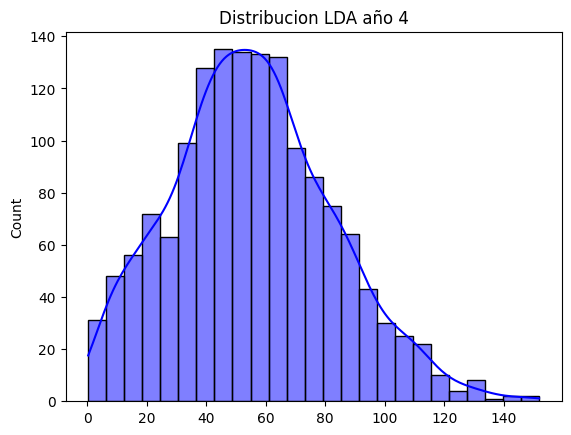

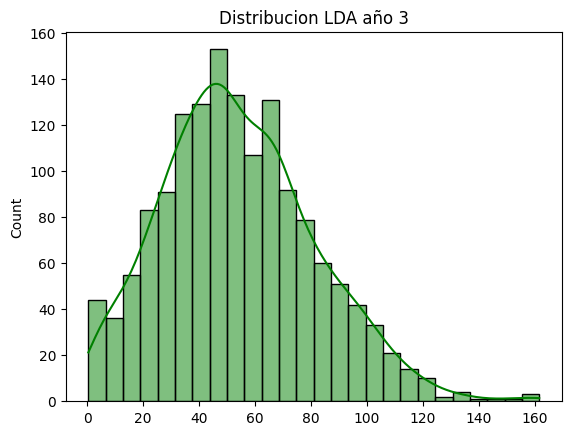

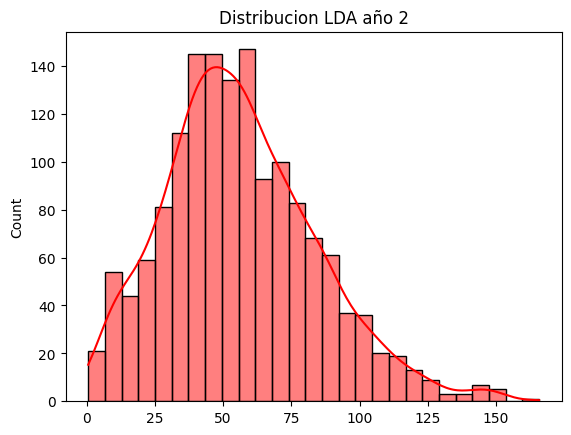

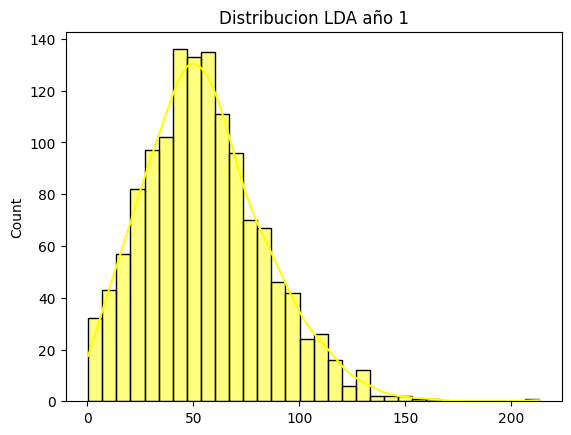

,li,ls,ND,Perdidas
0,0.354255,6.413599,3.383927,31.0
1,6.413599,12.472944,9.443272,48.0
2,12.472944,18.532289,15.502616,56.0
3,18.532289,24.591633,21.561961,72.0
4,24.591633,30.650978,27.621306,63.0
5,30.650978,36.710322,33.680650,99.0
6,36.710322,42.769667,39.739995,128.0
7,42.769667,48.829012,45.799339,135.0
8,48.829012,54.888356,51.858684,134.0
9,54.888356,60.947701,57.918029,133.0


,li,ls,ND,Perdidas
0,0.427835,6.874752,3.651293,47.0
1,6.874752,13.321669,10.098211,37.0
2,13.321669,19.768587,16.545128,61.0
3,19.768587,26.215504,22.992046,86.0
4,26.215504,32.662422,29.438963,100.0
5,32.662422,39.109339,35.885881,134.0
6,39.109339,45.556257,42.332798,145.0
7,45.556257,52.003174,48.779716,156.0
8,52.003174,58.450092,55.226633,117.0
9,58.450092,64.897009,61.673551,120.0


,li,ls,ND,Perdidas
0,0.568346,7.177506,3.872926,25.0
1,7.177506,13.786666,10.482086,57.0
2,13.786666,20.395825,17.091246,51.0
3,20.395825,27.004985,23.700405,75.0
4,27.004985,33.614145,30.309565,102.0
5,33.614145,40.223305,36.918725,127.0
6,40.223305,46.832465,43.527885,160.0
7,46.832465,53.441625,50.137045,147.0
8,53.441625,60.050785,56.746205,156.0
9,60.050785,66.659945,63.355365,112.0


,li,ls,ND,Perdidas
0,0.413092,8.925959,4.669526,43.0
1,8.925959,17.438827,13.182393,65.0
2,17.438827,25.951694,21.695260,93.0
3,25.951694,34.464561,30.208127,124.0
4,34.464561,42.977428,38.720995,137.0
5,42.977428,51.490296,47.233862,182.0
6,51.490296,60.003163,55.746729,168.0
7,60.003163,68.516030,64.259597,144.0
8,68.516030,77.028898,72.772464,99.0
9,77.028898,85.541765,81.285331,88.0


In [ ]:
nc=25 #Numero de clusters o intervalos para las distribuciones

#Graficos de cada año
plt.figure()
sns.histplot(LDA4,kde=True,color="blue")
plt.title("Distribucion LDA año 4")
plt.show()

plt.figure()
sns.histplot(LDA3,kde=True,color="green")
plt.title("Distribucion LDA año 3")
plt.show()

plt.figure()
sns.histplot(LDA2,kde=True,color="red")
plt.title("Distribucion LDA año 2")
plt.show()

plt.figure()
sns.histplot(LDA1,kde=True,color="yellow")
plt.title("Distribucion LDA año 1")
plt.show()

#Informacion de las distribuciones
counts4, bin_edges4 = np.histogram(LDA4, bins=nc)
li4=bin_edges4[:-1];ls4=bin_edges4[1:]
mc4=(li4+ls4)/2

counts3, bin_edges3 = np.histogram(LDA3, bins=nc)
li3=bin_edges3[:-1];ls3=bin_edges3[1:]
mc3=(li3+ls3)/2

counts2, bin_edges2 = np.histogram(LDA2, bins=nc)
li2=bin_edges2[:-1];ls2=bin_edges2[1:]
mc2=(li2+ls2)/2

counts1, bin_edges1 = np.histogram(LDA1, bins=nc)
li1=bin_edges1[:-1];ls1=bin_edges1[1:]
mc1=(li1+ls1)/2

#Tablas de caracterizacion
tasq4=np.column_stack((li4,ls4,mc4,counts4))
df4=pd.DataFrame(tasq4,columns=["li","ls","ND","Perdidas"])

tasq3=np.column_stack((li3,ls3,mc3,counts3))
df3=pd.DataFrame(tasq3,columns=["li","ls","ND","Perdidas"])

tasq2=np.column_stack((li2,ls2,mc2,counts2))
df2=pd.DataFrame(tasq2,columns=["li","ls","ND","Perdidas"])

tasq1=np.column_stack((li1,ls1,mc1,counts1))
df1=pd.DataFrame(tasq1,columns=["li","ls","ND","Perdidas"])

display(df4)
display(df3)
display(df2)
display(df1)


3. Se obtienen las medidas de tendencia central y dispersion para todos los años

In [ ]:
#Medias de los cuatro años
u4=np.sum(mc4*counts4)/np.sum(counts4)
print("media del año 4 es:",u4)
u3=np.sum(mc3*counts3)/np.sum(counts3)
print("media del año 3 es:",u3)
u2=np.sum(mc2*counts2)/np.sum(counts2)
print("media del año 2 es:",u2)
u1=np.sum(mc1*counts1)/np.sum(counts1)
print("media del año 1 es:",u1)

#Varianza de los cuatro años
var4=np.sum(counts4*(mc4-u4)**2)/np.sum(counts4)
print("Varianza del año 4 es:",var4)
var3=np.sum(counts3*(mc3-u3)**2)/np.sum(counts3)
print("Varianza del año 3 es:",var3)
var2=np.sum(counts2*(mc2-u2)**2)/np.sum(counts2)
print("Varianza del año 2 es:",var2)
var1=np.sum(counts1*(mc1-u1)**2)/np.sum(counts1)
print("Varianza del año 1 es:",var1)

#Desviacion de los cuatro años
desv4=np.sqrt(var4)
print("Desviacion del año 4 es:",desv4)
desv3=np.sqrt(var3)
print("Desviacion del año 3 es:",desv3)
desv2=np.sqrt(var2)
print("Desviacion del año 2 es:",desv2)
desv1=np.sqrt(var1)
print("Desviacion del año 1 es:",desv1)

#coeficiente de asimetria de los cuatro años
from scipy.stats import skew,kurtosis
cas4=np.sum(counts4*(mc4-u4)**3)/np.sum((counts4)*desv4**3)
print("Asimetria del año 4 es:",cas4)
cas3=np.sum(counts3*(mc3-u3)**3)/np.sum((counts3)*desv3**3)
print("Asimetria del año 3 es:",cas3)
cas2=np.sum(counts2*(mc2-u2)**3)/np.sum((counts2)*desv2**3)
print("Asimetria del año 2 es:",cas2)
cas1=np.sum(counts1*(mc1-u1)**3)/np.sum((counts1)*desv1**3)
print("Asimetria del año 1 es:",cas1)

#Coeficiente de curtosis de los cuatros años
cur4=np.sum(counts4*(mc4-u4)**4)/np.sum((counts4)*desv4**4)
print("Curtosis del año 4 es:",cur4)
cur3=np.sum(counts3*(mc3-u3)**4)/np.sum((counts3)*desv3**4)
print("Curtosis del año 3 es:",cur3)
cur2=np.sum(counts2*(mc2-u2)**4)/np.sum((counts2)*desv2**4)
print("Curtosis del año 2 es:",cur2)
cur1=np.sum(counts1*(mc1-u1)**4)/np.sum((counts1)*desv1**4)
print("Curtosis del año 1 es:",cur1)

media del año 4 es: 55.47409306676382
media del año 3 es: 54.092731558595894
media del año 2 es: 56.340843018413075
media del año 1 es: 55.49933607475022
Varianza del año 4 es: 729.4417988182668
Varianza del año 3 es: 743.9085328450855
Varianza del año 2 es: 777.1244171459498
Varianza del año 1 es: 816.9150529306955
Desviacion del año 4 es: 27.008180220412235
Desviacion del año 3 es: 27.274686668137647
Desviacion del año 2 es: 27.876951360325428
Desviacion del año 1 es: 28.581725856405093
Asimetria del año 4 es: 0.3265090828448374
Asimetria del año 3 es: 0.45477925184936424
Asimetria del año 2 es: 0.5504267250006681
Asimetria del año 1 es: 0.6004938670238729
Curtosis del año 4 es: 2.904131579455431
Curtosis del año 3 es: 3.1328511905956993
Curtosis del año 2 es: 3.313467466424928
Curtosis del año 1 es: 3.6177731437380745


In [ ]:
#Outliers de cada año
LIe4=u4-2*desv4;LSe4=u4+2*desv4
filas_out=np.where((LDA4<LIe4)|(LDA4>LSe4))[0]
LDA4.iloc[filas_out,]
LIe3=u3-2*desv3;LSe3=u3+2*desv3
filas_out=np.where((LDA3<LIe3)|(LDA3>LSe3))[0]
LDA3.iloc[filas_out,]
LIe2=u2-2*desv2;LSe2=u2+2*desv2
filas_out=np.where((LDA2<LIe2)|(LDA2>LSe2))[0]
LDA2.iloc[filas_out,]
LIe1=u1-2*desv1;LSe1=u1+2*desv1
filas_out=np.where((LDA1<LIe1)|(LDA1>LSe1))[0]
LDA1.iloc[filas_out,]

4. Parametros de riesgo: Perdidas Esperadas, Perdidas no esperadas, Perdidas Catastroficas

**Analisis de Resultados**
De acuerdo a los visto en el codigo estos son los resultados y datos de cada año tiene el siguiente numero de datos y variables socioeconomicas:Año 4 tiene un total de 1500 datos y 36 variables socioeconomicas,Año 3 tiene un total de 1501 datos y 36 variables socioeconomicas, Año 2 tiene un total de 1500 datos y 36 variables socioeconomicas, Año 1 es el año con menos datos con 1342 y 36 variables socioeconomicas ademas para todos los años hubo un total de 50 outliers

En cuanto a las medidas de tendencia central el año 4 tiene un media de 55 dolares y una desviacion de 27 dolares ademas de un coeficiente de asimetria de 0.32 con cola hacia la derecha y una curtosis positiva que muestra datos comprimidos.
el año 3 se ubico con una media de 54 dolares y una desviacion de 27.27 dolares ademas un coeficiente de asimetria 0.45 mayor al año anterior mostrando una mayor desviacion de los hacia la izquierda de la media y una curtosis positiva.
el año 2 se ubico con una media de 56 dolares y una desviacion de 27.87 dolares ademas un coeficiente de asimetria 0.55 mayor al año anterior mostrando una mayor desviacion de los hacia la izquierda de la media y una curtosis positiva.
el año 1 se ubico con una media de 55 dolares y una desviacion de 28.58 dolares ademas un coeficiente de asimetria 0.60 mayor al año anterior mostrando una mayor desviacion de los hacia la izquierda de la media y una curtosis positiva.

En cuanto a las perdidas esperadas se denota un aumento de estas entre el año 4 hasta el año 2 con valores de 778, 803, 812 dolares respectivamente mientras que el año 1 hay una disminucion ha 721 dolares.
El costo de los aseguramientos se denota unos valores de mas dispersos siendo el año 2 y 4 con 149 y 147 dolares respectivamente y siendo mayores los de los años 1 y 3 con 161 y 160 dolares.
Las perdidas catastroficas se mantuvieron constantes en el tiempo con valor de 2 dolares para todos los años.
Por ultimo las perdidas no esperadas han disminuido con el paso del tiempo pasando de 720 dolares en el año 4 hasta 619 dolares en el año 1


In [ ]:
#Perdidas año 4
PE4=len(np.where(LDA4<u4)[0])
print("Las Perdidas Esperadas en el año 4 son:",PE4)
Opvar4=np.percentile(LDA4,99.9)
print("El costo de aseguramiento de los seguros en el año 4:",Opvar4)
PC4=len(np.where(LDA4>Opvar4)[0])
print("Las perdidas catastroficas en el año 4 son:",PC4)
PNE4=len(np.where((LDA4>=u4)&(LDA4<Opvar4))[0])
print("Las perdidas no esperadas en el año 4 son:",PNE4)

#Perdidas año 3
PE3=len(np.where(LDA3<u3)[0])
print("Las Perdidas Esperadas en el año 3 son:",PE3)
Opvar3=np.percentile(LDA3,99.9)
print("El costo de aseguramiento de los seguros en el año 3:",Opvar3)
PC3=len(np.where(LDA3>Opvar3)[0])
print("Las perdidas catastroficas en el año 3 son:",PC3)
PNE3=len(np.where((LDA3>=u3)&(LDA3<Opvar3))[0])
print("Las perdidas no esperadas en el año 3 son:",PNE3)

#Perdidas año 2
PE2=len(np.where(LDA2<u2)[0])
print("Las Perdidas Esperadas en el año 2 son:",PE2)
Opvar2=np.percentile(LDA2,99.9)
print("El costo de aseguramiento de los seguros en el año 2:",Opvar2)
PC2=len(np.where(LDA2>Opvar2)[0])
print("Las perdidas catastroficas en el año 2 son:",PC2)
PNE2=len(np.where((LDA2>=u2)&(LDA2<Opvar2))[0])
print("Las perdidas no esperadas en el año 2 son:",PNE2)

#Perdidas año 1
PE1=len(np.where(LDA1<u1)[0])
print("Las Perdidas Esperadas en el año 1 son:",PE1)
Opvar1=np.percentile(LDA1,99.9)
print("El costo de aseguramiento de los seguros en el año 1:",Opvar1)
PC1=len(np.where(LDA1>Opvar1)[0])
print("Las perdidas catastroficas en el año 1 son:",PC1)
PNE1=len(np.where((LDA1>=u1)&(LDA1<Opvar1))[0])
print("Las perdidas no esperadas en el año 1 son:",PNE1)

Las Perdidas Esperadas en el año 4 son: 778
El costo de aseguramiento de los seguros en el año 4: 147.29776773898615
Las perdidas catastroficas en el año 4 son: 2
Las perdidas no esperadas en el año 4 son: 720
Las Perdidas Esperadas en el año 3 son: 803
El costo de aseguramiento de los seguros en el año 3: 160.70668633158058
Las perdidas catastroficas en el año 3 son: 2
Las perdidas no esperadas en el año 3 son: 696
Las Perdidas Esperadas en el año 2 son: 812
El costo de aseguramiento de los seguros en el año 2: 149.7093186014969
Las perdidas catastroficas en el año 2 son: 2
Las perdidas no esperadas en el año 2 son: 686
Las Perdidas Esperadas en el año 1 son: 721
El costo de aseguramiento de los seguros en el año 1: 161.29129989014118
Las perdidas catastroficas en el año 1 son: 2
Las perdidas no esperadas en el año 1 son: 619
